In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from matplotlib import pyplot as plt
%matplotlib inline 
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
predict_df = pd.read_csv('test.csv', index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
n = train_df.isnull().sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005835A58>,
      dtype=object)

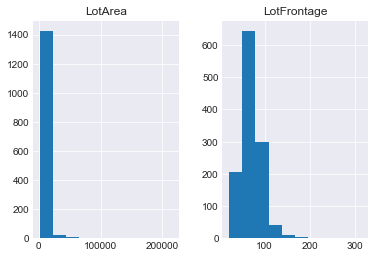

In [5]:
train_df.iloc[:,1:10].hist()

# 2. Data overlook

In [6]:
y_org = train_df['SalePrice']

In [7]:
y = np.log1p(train_df.pop('SalePrice'))

In [8]:
all_df = pd.concat((train_df,predict_df),axis=0)

In [9]:
train_df.shape

(1460, 79)

In [10]:
predict_df.shape

(1459, 79)

In [11]:
all_df.shape

(2919, 79)

### check how many Nan in each column and sort them (only show columns that contains Nans)

In [12]:
Nanindex = all_df.isnull().sum().sort_values(ascending=False)/2919
Nanindex[Nanindex>0]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageCond      0.054471
GarageQual      0.054471
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
BsmtFullBath    0.000685
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior1st     0.000343
SaleType        0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageArea      0.000343
GarageCars      0.000343
dtype: float64

# 3. Data cleaning

### filling Nans one by one

In [13]:
all_df.PoolQC.fillna('NoPool',inplace=True)
all_df.MiscFeature.fillna('NoMiscFeature',inplace=True)
all_df.Alley.fillna('NoAlley',inplace=True)
all_df.Fence.fillna('NoFence',inplace=True)
all_df.FireplaceQu.fillna('NoFireplace',inplace=True)
all_df.GarageCond.fillna('NoGarage',inplace=True)
all_df.GarageQual.fillna('NoGarage',inplace=True)
all_df.GarageYrBlt .fillna(all_df.GarageYrBlt.mean(),inplace=True)
all_df.GarageFinish.fillna('NoGarage',inplace=True)
all_df.GarageType.fillna('NoGarage',inplace=True)
all_df.BsmtExposure .fillna('Nobsmt',inplace=True)
all_df.BsmtCond.fillna('Nobsmt',inplace=True)
all_df.BsmtQual.fillna('Nobsmt',inplace=True)
all_df.BsmtFinType2.fillna('Nobsmt',inplace=True)
all_df.BsmtFinType1.fillna('Nobsmt',inplace=True)
all_df.LotFrontage .fillna(all_df.LotFrontage.mean(),inplace=True)

### filling the remaining with most frequent values

In [14]:
Nanindex = all_df.isnull().sum().sort_values(ascending=False)/2919
nanremin = list(Nanindex[Nanindex>0].keys())

for head in nanremin:
    all_df[head].fillna(all_df[head].value_counts()[0],inplace=True)

### map quality variables to numerical variables

In [15]:
ExterQual_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
all_df.replace({"ExterQual": ExterQual_rep},inplace=True)

ExterCond_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1,'Po':0}
all_df.replace({"ExterCond": ExterCond_rep},inplace=True)

BsmtQual_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Nobsmt':0}
all_df.replace({"BsmtQual": BsmtQual_rep},inplace=True)

BsmtCond_rep = {'TA':3, 'Gd':4, 'Nobsmt':0, 'Fa':2, 'Po':1}
all_df.replace({"BsmtCond": BsmtCond_rep},inplace=True)

BsmtExposure_rep = {'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'Nobsmt':0}
all_df.replace({"BsmtExposure": BsmtExposure_rep},inplace=True)

HeatingQC_rep = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
all_df.replace({"HeatingQC": HeatingQC_rep},inplace=True)

KitchenQual_rep = {'Gd':2, 'TA':1, 'Ex':3, 'Fa':0, 1492:0}
all_df.replace({"KitchenQual": KitchenQual_rep},inplace=True)

FireplaceQu_rep = {'NoFireplace':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1}
all_df.replace({"FireplaceQu": FireplaceQu_rep},inplace=True)

GarageQual_rep = {'TA':3, 'Fa':2, 'Gd':4, 'NoGarage':0, 'Ex':5, 'Po':1}
all_df.replace({"GarageQual": GarageQual_rep},inplace=True)

GarageCond_rep = {'TA':3, 'Fa':2, 'NoGarage':0, 'Gd':4, 'Po':1, 'Ex':5}
all_df.replace({"GarageCond": GarageCond_rep},inplace=True)

PoolQC_rep = {'NoPool':0, 'Ex':3, 'Fa':1, 'Gd':2}
all_df.replace({"PoolQC": PoolQC_rep},inplace=True)


In [16]:
all_df['Solddate'] = all_df.YrSold + all_df.MoSold/12
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

In [17]:
class_variables = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1','BsmtFinType2','Heating', 'CentralAir', 'Electrical','Functional', 'GarageType', 'GarageFinish','PavedDrive','Fence', 'MiscFeature',  'SaleType', 'SaleCondition']
num_variables = l3 = [x for x in list(all_df) if x not in class_variables]

# 4.data visulization 

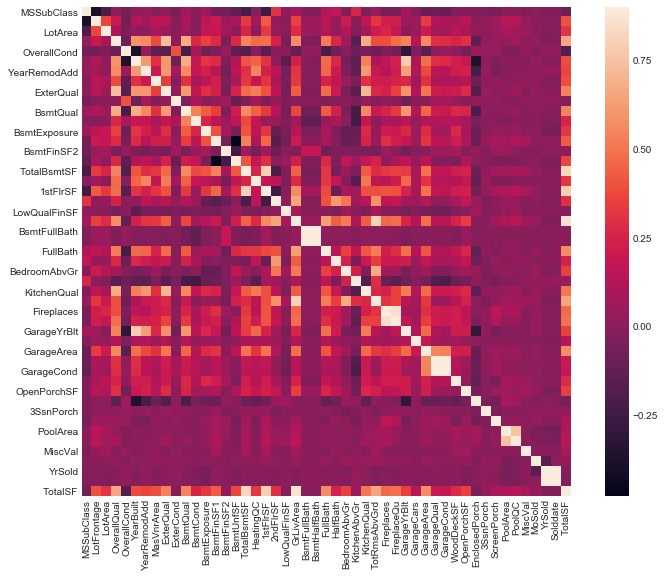

In [18]:
corrmat = all_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### plot all the num_variables vs. sale price. 

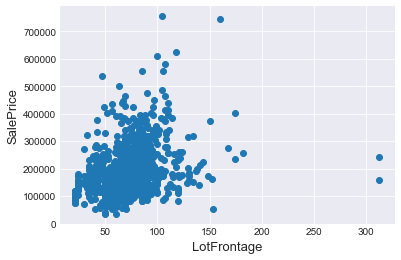

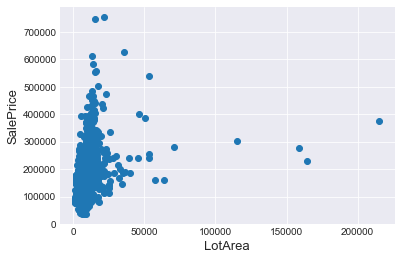

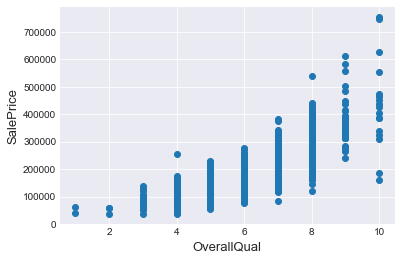

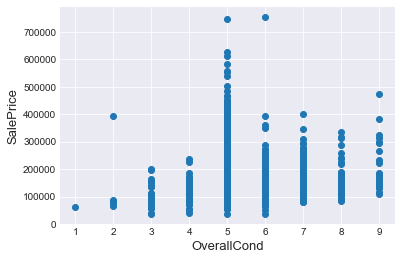

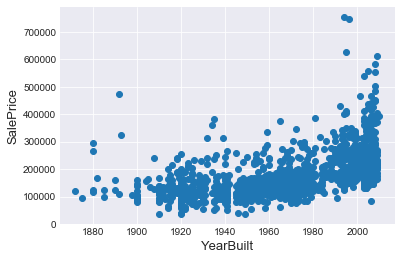

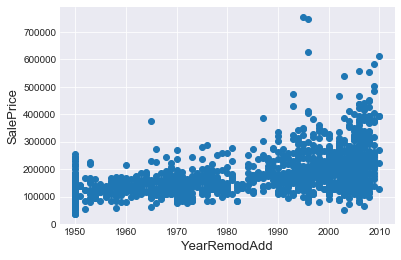

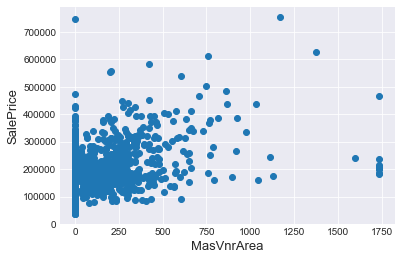

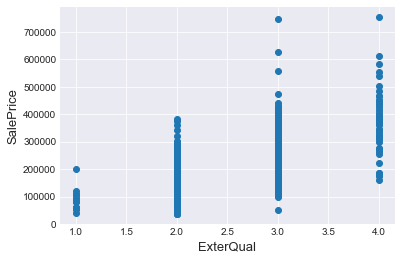

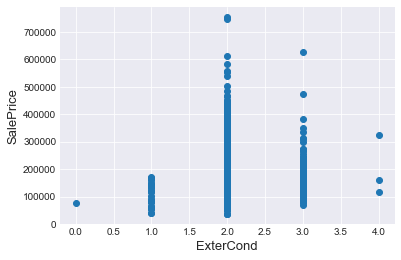

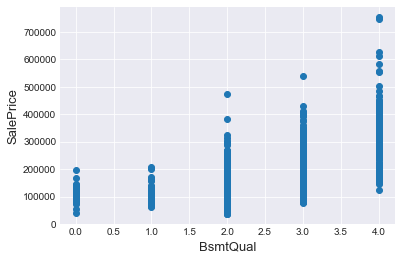

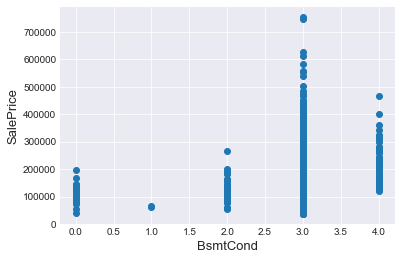

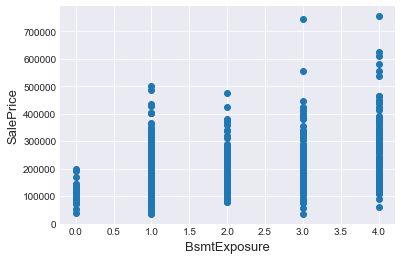

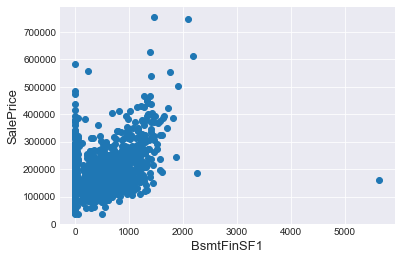

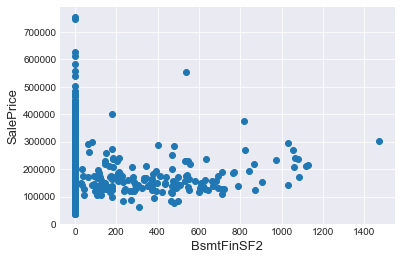

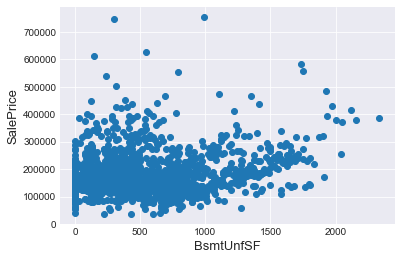

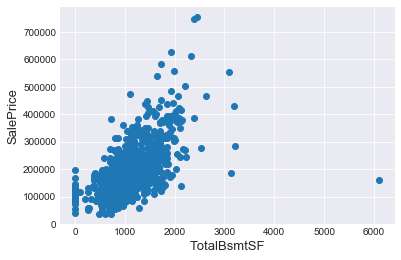

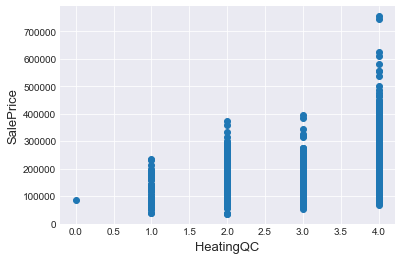

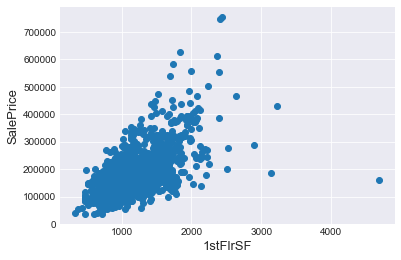

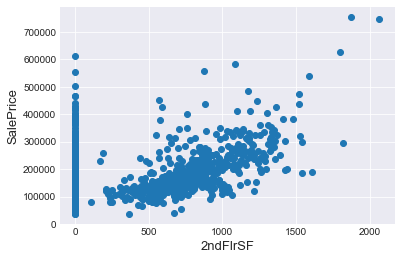

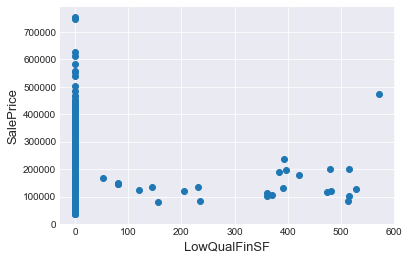

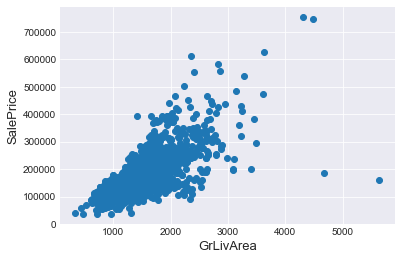

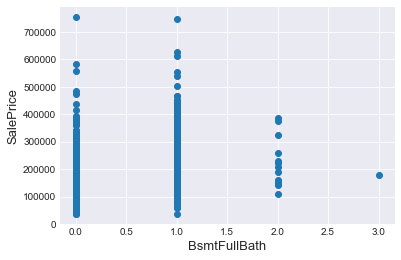

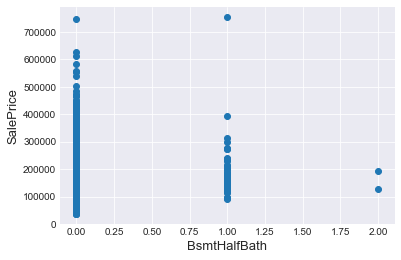

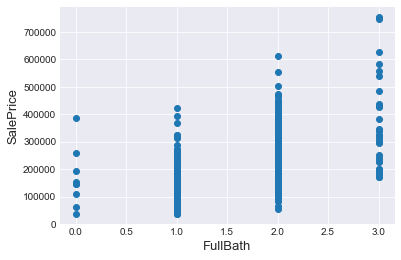

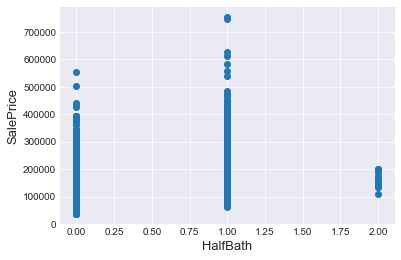

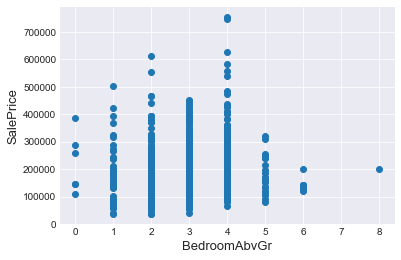

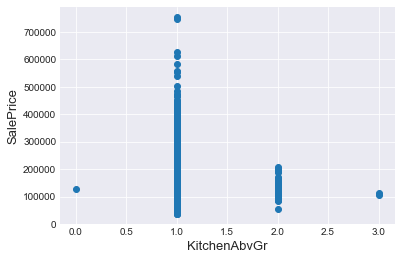

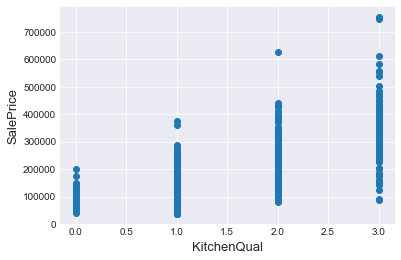

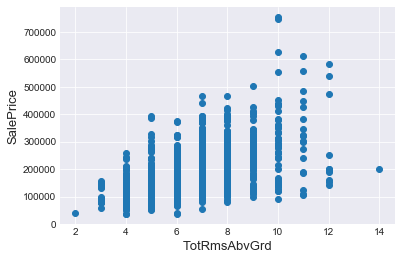

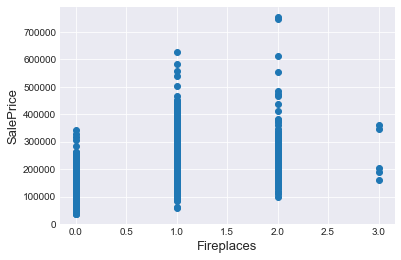

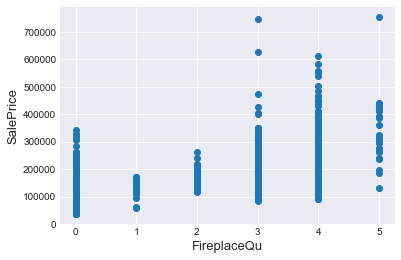

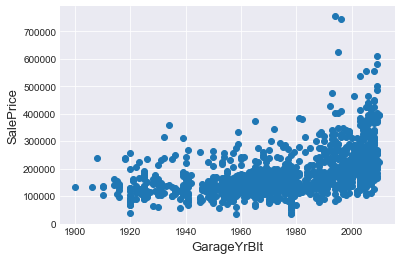

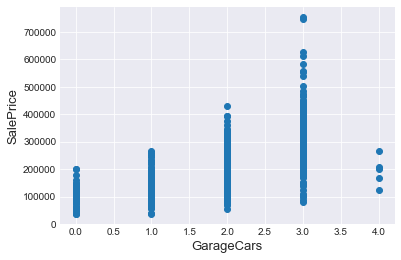

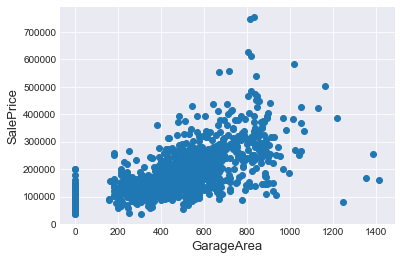

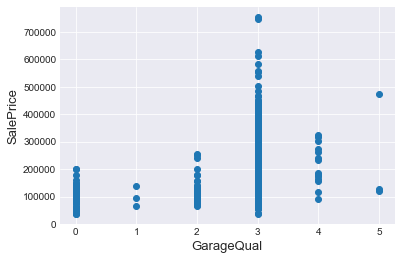

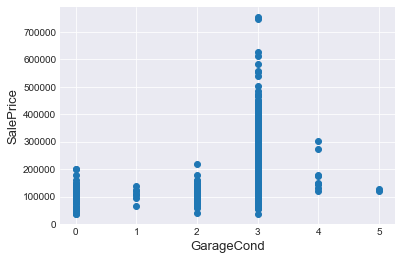

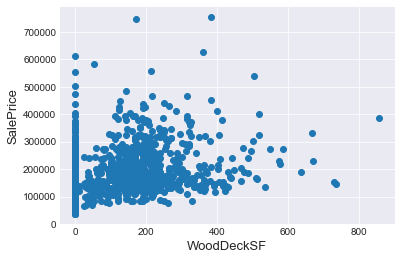

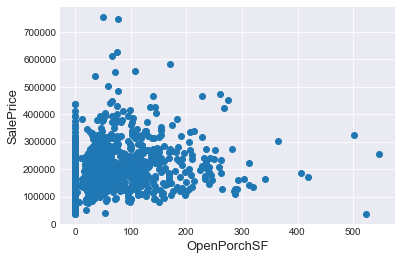

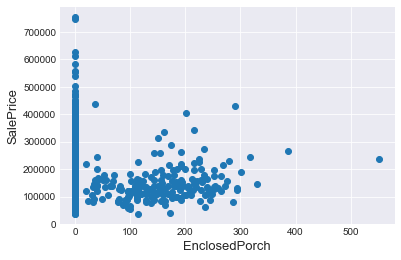

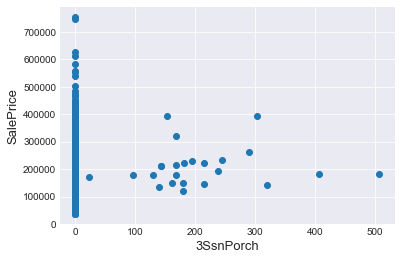

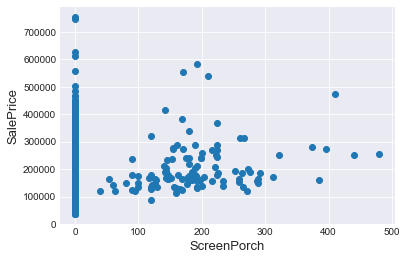

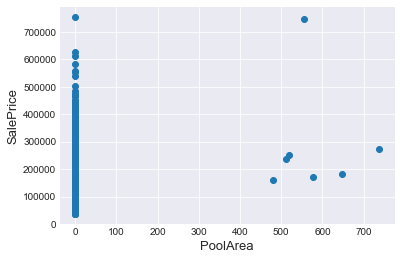

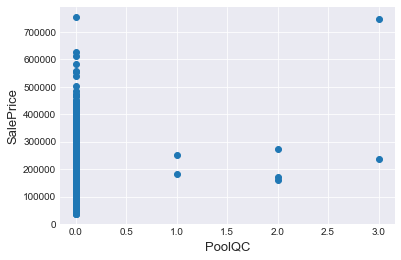

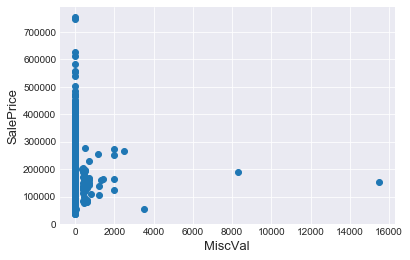

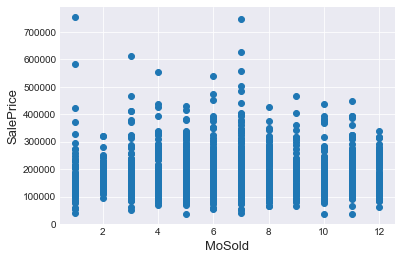

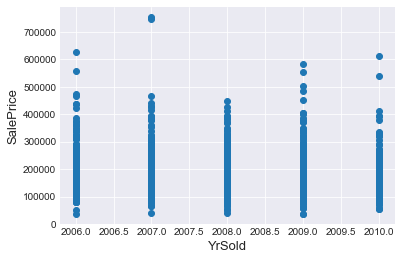

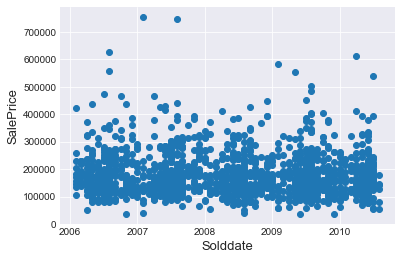

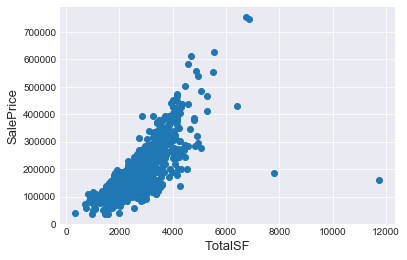

In [19]:
for head in num_variables:
    fig, ax = plt.subplots()
    ax.scatter(x = all_df[head].loc[train_df.index], y = y_org )
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(head, fontsize=13)
    plt.show()

### remove outliers 

In [20]:
data_all = [all_df,train_df,y,y_org]
outlier1 = (all_df['LotFrontage'].loc[train_df.index]>250) & (y_org<300000)
outlier2 = (all_df['BsmtFinSF1'].loc[train_df.index]>3000) & (y_org<200000)
outlier3 = (all_df['1stFlrSF'].loc[train_df.index]>4000) & (y_org<200000)
outlier4 = (all_df['GrLivArea'].loc[train_df.index]>4000) & (y_org<210000)
outlier = outlier1|outlier2|outlier3|outlier4
for dataframe in data_all:
    dataframe.drop(outlier[outlier].index,inplace=True,errors='ignore')


# 5.feature enginering

### remove the skewness in the distribution

In [21]:
numeric_feats = all_df.dtypes[all_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
GarageCars,48.744418
BsmtHalfBath,38.143800
BsmtFullBath,38.136583
MiscVal,21.935910
PoolQC,20.393518
PoolArea,17.685603
LotArea,13.139681
LowQualFinSF,12.082427
3SsnPorch,11.370087
BsmtFinSF2,4.713198


In [22]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_df[feat] = boxcox1p(all_df[feat], lam)

There are 49 skewed numerical features to Box Cox transform


### Creat one-hot coding for class variables 

In [23]:
all_df[class_variables] = all_df[class_variables].astype(str)
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,5.831328,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
2,6.221214,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,1.194318,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
3,5.914940,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
4,5.684507,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,1.194318,1.194318,1.194318,...,0,0,0,1,1,0,0,0,0,0
5,6.314735,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0


In [26]:
train, test, y_train, y_test = train_test_split(all_dummy_df.loc[train_df.index], y, test_size=0.2, random_state=42)
X_predict = all_dummy_df.loc[predict_df.index]

# 6. modeling

In [27]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [28]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base models

#### LASSO Regression :

In [29]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0006, random_state=1))

#### Elastic Net Regression :

In [30]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=1, random_state=3))

#### Kernel Ridge Regression :

In [31]:
KRR = KernelRidge(alpha=6, kernel='polynomial', degree=2.5, coef0=7.5)

#### Gradient Boosting Regression :

In [32]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01,
                                   max_depth=4, max_features=0.05,
                                   min_samples_leaf=2, min_samples_split=200, 
                                   loss='huber', random_state =5)

#### XGBoost:

In [33]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=5200,
                             reg_alpha=0.4640, reg_lambda=0.9,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### LightGBM :

In [34]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Hyperparmater tuning 

In [ ]:
from pactools.grid_search import GridSearchCVProgressBar

In [ ]:
# {'colsample_bytree':[0.4603,1], 'gamma':[0.001,0.0468,0.5,0.1], 
#                              'learning_rate':[0.01,0.05,0.1], 'max_depth':[3,10,100], 
#                              'min_child_weight':[2,10], 'n_estimators':[5200],
#                              'reg_alpha':[0.4640], 'reg_lambda':[0.9],
#                              'subsample':[0.5213], 'silent':[1]}

# {'colsample_bytree': 1, 'gamma': 0.0468, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 5200, 'reg_alpha': 0.464, 'reg_lambda': 0.9, 'silent': 1, 'subsample': 0.5213}

tuned_parameters = [{'colsample_bytree':[1], 'gamma':[0.0468,0.1], 
                             'learning_rate':[0.01,0.05], 'max_depth':[10,100], 
                             'min_child_weight':[2,10], 'n_estimators':[5200],
                             'reg_alpha':[0.4640], 'reg_lambda':[0.9],
                             'subsample':[0.5213], 'silent':[1]}]


kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)

clf = GridSearchCVProgressBar(xgb.XGBRegressor(), tuned_parameters, cv=kf,
                       scoring='neg_mean_squared_error', n_jobs=-1,verbose=2)
clf.fit(train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (np.sqrt(-mean), std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

### score of base model

In [35]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1159 (0.0120)



In [36]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1156 (0.0116)



In [37]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1150 (0.0107)



In [38]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1131 (0.0110)



In [39]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1170 (0.0105)



In [40]:


score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1145 (0.0074)



### Stacking models

#### Simplest Stacking approach : Averaging base models

In [41]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [42]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1105 (0.0118)



#### Less simple Stacking : Adding a Meta-model

In [43]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [44]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1095 (0.0112)


#### final submission

In [45]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [46]:
stacked_averaged_models.fit(train.values, y_train.values)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_predict.values))
print(rmsle(y_train, stacked_train_pred))

0.0814449789083456


In [47]:
model_xgb.fit(train, y_train.values)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(X_predict))
print(rmsle(y_train, xgb_train_pred))

0.07529029798183164


In [48]:
model_lgb.fit(train,  y_train.values)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(X_predict.values))
print(rmsle(y_train, lgb_train_pred))

0.06543103377787869


In [49]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07617031687381426


In [53]:
y_test_ = model_lgb.predict(test)

In [62]:
test.TotalSF

Id
498     15.315316
1265    15.192954
412     14.353864
1050    11.922126
1037    15.746881
615     12.787651
219     15.204889
1399    15.611816
1195    14.206211
887     15.847258
1103    14.401310
609     16.602067
1311    16.292808
568     15.546873
812     13.673805
1036    11.657081
169     14.968995
1455    14.816449
1147    15.014345
68      15.413663
1324    12.467644
452     15.562123
670     13.990324
876     16.283746
193     15.333803
124     14.757961
414     14.238681
278     13.730883
1055    15.549055
663     15.242836
          ...    
234     13.835525
1220    14.006760
197     15.960920
1226    13.727342
82      14.986695
1369    13.673805
1154    13.556850
112     13.879946
1243    14.520202
1321    15.440671
1359    14.664378
345     13.586449
1232    14.618786
624     14.579663
569     16.130285
1307    15.185775
902     14.621565
1083    15.397821
366     14.207763
1450    12.787651
990     14.687651
372     13.474162
720     14.091054
487     14.404256
628    

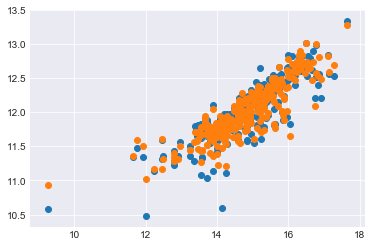

In [65]:
plt.scatter(test.TotalSF,y_test)
plt.scatter(test.TotalSF,y_test_)

In [50]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [51]:
submission_df = pd.DataFrame(data= {'Id' : predict_df.index, 'SalePrice': ensemble})

In [52]:
submission_df.head()

,Id,SalePrice
0,1461,118654.369561
1,1462,162954.335914
2,1463,189094.057046
3,1464,197099.544826
4,1465,190495.316480


In [ ]:
submission_df.to_csv('submit.csv', index=False)